<a href="https://colab.research.google.com/github/pattanps/ppm2-ML-AI-course/blob/main/ppm2ml_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisor Learning
## 1. Import data [นำข้อมูลเข้า]
## 2. Preprocessing data, data wrangling [จัดการสิ่งรบกวน].
## 3. Choose a mathematical model [Classification: Random forest]
## 4. Train, Learning [ร่ำเรียน, ฝึกฝน]
## 5. Evaluation [วิเคราะห์]
## 6. Decision [ตัดสินใจ]


In [1]:
#install important libraries

# Pandas
# yfinance
! pip install yfinance 

     |████████████████████████████████| 50 kB 638 kB/s eta 0:00:01
     |████████████████████████████████| 499 kB 355 kB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 1.7 MB/s eta 0:00:01
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
     |████████████████████████████████| 110 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 1.5 MB/s eta 0:00:01
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1


In [3]:
import yfinance as yf
ethusd = yf.Ticker("ETH-USD")
fdata = ethusd.history(period="max")

fdata.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0,0


In [4]:
# เพิ่มแถวข้อมูล
# 1. moving average period 20
# 2. moving average period 100
# 3. Standard variation

# 1. moving average period 20
fdata["MovingAverage 20"]= fdata['Close'].rolling(20).mean()
fdata["MovingAverage 100"]= fdata['Close'].rolling(100).mean()
# เพิ่ม moving average 200 
# หาขนาด ความผันผวน Volatility 

In [14]:
fdata[100:120]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MovingAverage 20,MovingAverage 100
Date,,,,,,,,,
2018-02-17 00:00:00+00:00,944.747986,976.594971,940.754028,974.114990,2525720064,0,0,912.039548,769.617271
2018-02-18 00:00:00+00:00,973.348999,982.932983,915.445007,923.921021,2567290112,0,0,899.117599,775.863951
2018-02-19 00:00:00+00:00,921.668030,957.776978,921.554016,943.864990,2169019904,0,0,892.754349,782.155791
2018-02-20 00:00:00+00:00,943.567017,965.265015,892.953979,895.370972,2545260032,0,0,881.607394,788.030421
2018-02-21 00:00:00+00:00,894.135010,912.375000,830.562988,849.971008,2531729920,0,0,872.266443,793.362971
2018-02-22 00:00:00+00:00,849.262024,875.926025,802.668030,812.844971,2150370048,0,0,867.119443,798.115110
2018-02-23 00:00:00+00:00,811.585022,886.317993,794.791016,864.189026,2334820096,0,0,862.127945,803.423431
2018-02-24 00:00:00+00:00,861.593018,879.531006,818.549988,840.515015,1926579968,0,0,862.419595,808.519341
2018-02-25 00:00:00+00:00,839.458984,853.145996,822.380981,844.809998,1646960000,0,0,869.762546,813.643501


In [16]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 6.8 MB/s 


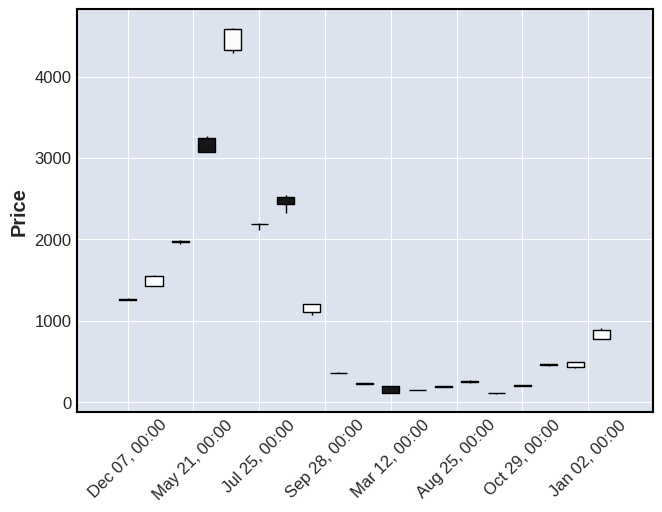

In [24]:
import mplfinance as mpf
fdata.index.name = 'Date'

mpf.plot(fdata[::-100],type='candle')

In [25]:
type(fdata)

pandas.core.frame.DataFrame

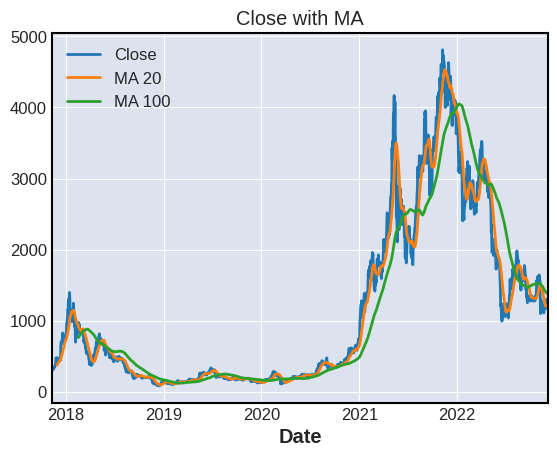

In [39]:
chart = fdata['Close'].plot(title="Close with MA", label = "Close")
fdata['MovingAverage 20'].plot(fig=chart, label = "MA 20")
fdata['MovingAverage 100'].plot(fig=chart, label = "MA 100")
chart.legend()

In [40]:
# Install technical indicator for python

In [42]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_ta-0.3.14b0-py3-none-any.whl


In [57]:
import pandas_ta as ta

tafdata = fdata.ta

# create RSI data from fdata
rsi = tafdata.rsi()

rsi

Date
2017-11-09 00:00:00+00:00          NaN
2017-11-10 00:00:00+00:00          NaN
2017-11-11 00:00:00+00:00          NaN
2017-11-12 00:00:00+00:00          NaN
2017-11-13 00:00:00+00:00          NaN
                               ...    
2022-12-03 00:00:00+00:00    48.242340
2022-12-04 00:00:00+00:00    51.818349
2022-12-05 00:00:00+00:00    49.754853
2022-12-06 00:00:00+00:00    50.978344
2022-12-07 00:00:00+00:00    48.982265
Name: RSI_14, Length: 1855, dtype: float64

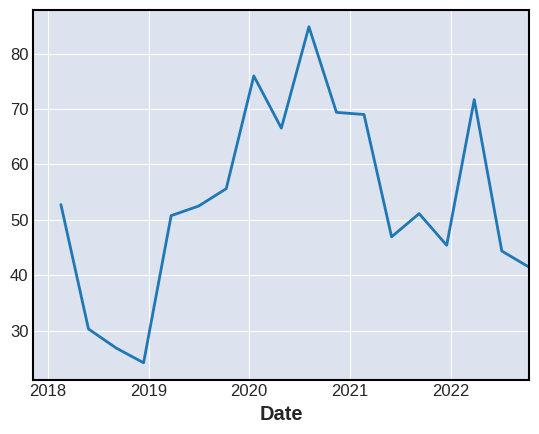

In [60]:
rsi[::100].plot()

In [2]:
# install time series analysis  tools 
# facebook prophet

!pip install prophet


     |████████████████████████████████| 8.9 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 187 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 3.5 MB/s eta 0:00:01
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
     |████████████████████████████████| 5.8 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 735 kB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732002 sha256=6f9001978d2f5fd419e99d23a9d2745610814f2cd3eb23645398db981fe3716a
  Stored in directory: /home/pattana/.cache/pip/wheels/c2/3a/3d/11734e652782d3f823a08aae1c452e887eb16349750cca3f8a
Successfully built pymeeus
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2


In [15]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [16]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

11:55:13 - cmdstanpy - INFO - Chain [1] start processing
11:55:13 - cmdstanpy - INFO - Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.205874,7.469390,8.907822
3266,2017-01-16,8.530900,7.821885,9.202068
3267,2017-01-17,8.318295,7.594894,9.042835
3268,2017-01-18,8.150892,7.406502,8.954371
3269,2017-01-19,8.162855,7.405302,8.876633


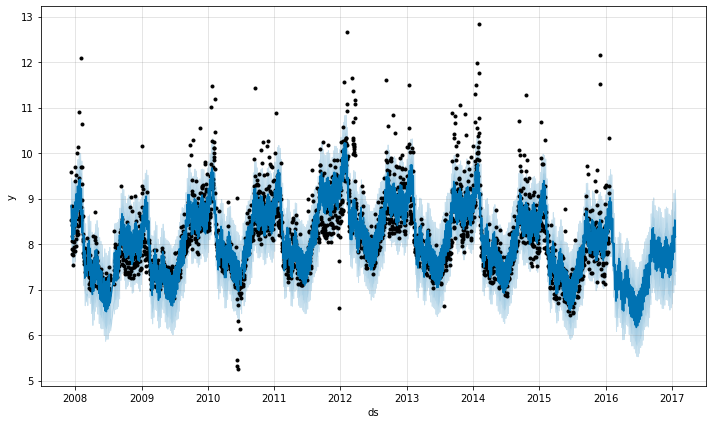

In [18]:
fig1 = m.plot(forecast)


# Using Prophet to forcast stock price.

In [27]:
#import data
import yfinance as yf
ethusd = yf.Ticker("TSLA")
fdata = tsla.history(period="max")
fdata.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-14 00:00:00-05:00,159.250000,161.619995,155.309998,156.800003,140682300,0.0,0.0
2022-12-15 00:00:00-05:00,153.440002,160.929993,153.279999,157.669998,122334500,0.0,0.0
2022-12-16 00:00:00-05:00,159.639999,160.990005,150.039993,150.229996,138459600,0.0,0.0
2022-12-19 00:00:00-05:00,154.000000,155.250000,145.820007,149.869995,139390600,0.0,0.0
2022-12-20 00:00:00-05:00,146.050003,148.470001,137.660004,137.800003,158881700,0.0,0.0


In [30]:
#remove not use columns
newdata = fdata.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
newdata.head()

,Close
Date,
2010-06-29 00:00:00-04:00,1.592667
2010-06-30 00:00:00-04:00,1.588667
2010-07-01 00:00:00-04:00,1.464000
2010-07-02 00:00:00-04:00,1.280000
2010-07-06 00:00:00-04:00,1.074000


In [38]:
#reset Index 
newdata.reset_index(inplace=True)

In [40]:
#create new colums name 'ds' and 'y'
newdata['ds'] = newdata['Date']
newdata['y'] = newdata['Close']

In [43]:
#remove no use columns
newdata.drop(columns=['Date','Close'],inplace=True)
newdata.head()

,ds,y
0,2010-06-29 00:00:00-04:00,1.592667
1,2010-06-30 00:00:00-04:00,1.588667
2,2010-07-01 00:00:00-04:00,1.464000
3,2010-07-02 00:00:00-04:00,1.280000
4,2010-07-06 00:00:00-04:00,1.074000


In [49]:
#remove timezone
newdata['ds'] = newdata['ds'].dt.tz_localize(None)

In [50]:
newdata.head()

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [52]:
#add future data
m = Prophet()
m.fit(newdata)
future = m.make_future_dataframe(periods=365)
future.tail()

13:34:50 - cmdstanpy - INFO - Chain [1] start processing
13:34:51 - cmdstanpy - INFO - Chain [1] done processing


,ds
3503,2023-12-16
3504,2023-12-17
3505,2023-12-18
3506,2023-12-19
3507,2023-12-20


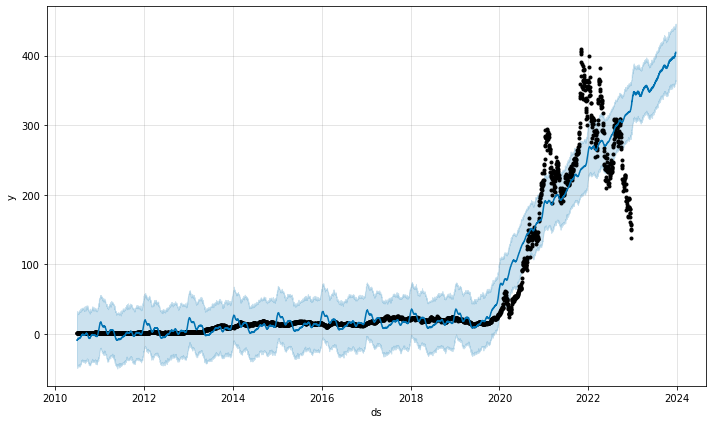

In [55]:
#make a prediction
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#plot
fig1 = m.plot(forecast)